## $${\bf{\color{blue}{\text{Ex. 1}}}}$$

$\newline$
### <a name='1'>${\bf{\text{Table of Contents:}}}$</a>
$\newline$
- [${\bf{\text{Data Loading}}}$](#2)
$\newline$
- [${\bf{\text{Data Reshaping}}}$](#3)
$\newline$
- [${\bf{\text{Showing the Pesudo RGB bands of the Data}}}$](#4)
$\newline$
- [${\bf{\text{Data Splitting}}}$](#5)
$\newline$
- [${\bf{\text{Shape of the Splitted Data}}}$](#6)
$\newline$
- [${\bf{\text{Data Scaling(X)}}}$](#7)
$\newline$
- [${\bf{\text{K-fold}}}$](#8)
$\newline$
- [${\bf{\text{PCA}}}$](#9)
$\newline$
- [${\bf{\text{SVC(Support Vector Classification)}}}$](#10)
$\newline$
- [${\bf{\text{Hyperparameter tuning}}}$](#11)
$\newline$
- [$\bf{\text{Test}}$](#12)
$\newline$

- [ ] **Task 1**

In [1]:
import os
import numpy as np
import pandas as pd
import pymatreader as pymat
from termcolor import colored
import matplotlib.pyplot as plt

- <a name='2'>${\bf{\text{Data Loading}}}$</a>

In [2]:
file_name_gt_str = 'Indian_pines_gt.mat'
file_name_all_str = 'Indian_pines.mat'
file_name_corr_str = 'Indian_pines_corrected.mat'
path_str = os.getcwd() + '/'

In [3]:
data_gt_ndarray = pymat.read_mat(path_str + file_name_gt_str)['indian_pines_gt']
data_main_ndarray = pymat.read_mat(path_str + file_name_all_str)['indian_pines']
data_corr_ndarray = pymat.read_mat(path_str + file_name_corr_str)['indian_pines_corrected']

In [4]:
print(f'\nType of the main data: {type(data_main_ndarray)}\n')
print(f'\nShape of the main data: {data_main_ndarray.shape}\n')
print(f'\nShape of the corrected data: {data_corr_ndarray.shape}\n')
print(f'\n... and its Data type: {colored(data_corr_ndarray.dtype, "green")}\n')
print(f'\nGroundtruth(label) data:\n\n{data_gt_ndarray}\n\n... its data type: \
{colored(data_gt_ndarray.dtype, "green")}\n\nand its shape: {data_gt_ndarray.shape}\n')
print(f'\nClasses: {np.unique(data_gt_ndarray)}\n')


Type of the main data: <class 'numpy.ndarray'>


Shape of the main data: (145, 145, 220)


Shape of the corrected data: (145, 145, 200)


... and its Data type: uint16


Groundtruth(label) data:

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

... its data type: uint8

and its shape: (145, 145)


Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]



- <a name='3'>${\bf{\text{Data Reshaping}}}$</a>

In [6]:
data_corr_reshaped_ndarray = data_corr_ndarray.reshape((data_corr_ndarray.shape[0]*data_corr_ndarray.shape[1], \
data_corr_ndarray.shape[2]))
data_gt_reshaped_ndarray = data_gt_ndarray.flatten()

In [7]:
print(f'\nShape of reshaped corrected data: {data_corr_reshaped_ndarray.shape} = (No. samples, No. features)\n')
print(f'\nShape of reshaped label data: {data_gt_reshaped_ndarray.shape} = (No.targets,)\n')


Shape of reshaped corrected data: (21025, 200) = (No. samples, No. features)


Shape of reshaped label data: (21025,) = (No.targets,)



In [8]:
print(f'\n5 features of first sample of corrected data: {data_corr_ndarray[1, 0, 0: 5]}\n')
print(f'\n5 features of first sample of reshaped corrected data: {data_corr_reshaped_ndarray[145, 0: 5]}\n')


5 features of first sample of corrected data: [2576 4388 4334 4279 4543]


5 features of first sample of reshaped corrected data: [2576 4388 4334 4279 4543]



- <a name='4'>${\bf{\text{Showing the Pesudo RGB bands of the Data}}}$</a>

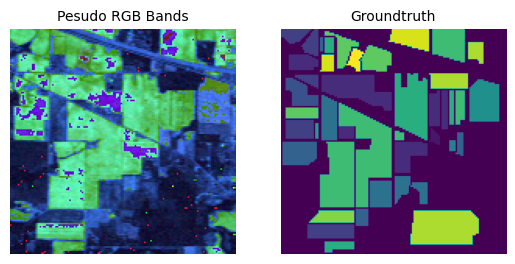

In [9]:
data_plot_ndarray = data_main_ndarray[:, :, [110, 200, 180]].astype(np.uint8)
plt.subplot(1, 2, 1), plt.imshow(data_plot_ndarray), plt.title('Pesudo RGB Bands', fontsize=10), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(data_gt_ndarray), plt.title('Groundtruth', fontsize=10), plt.axis('off')
plt.show()

- [x] **Task 1**

- [ ] **Task 2**

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

- <a name='5'>${\bf{\text{Data Splitting}}}$</a>

In [12]:
train_size_list = [0.02, 0.05, 0.1]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], data['y_test_' + str(train_size_float)] =\
    train_test_split(data_corr_reshaped_ndarray, data_gt_reshaped_ndarray, train_size=\
                     train_size_float, random_state=0)

- <a name='6'>${\bf{\text{Shape of the Splitted Data}}}$</a>

In [11]:
for train_size_float in train_size_list:
    print(f'\nTrain size: {colored(train_size_float, "green")}')
    print(f'X_train size: {data["X_train_" + str(train_size_float)].shape}')
    print(f'X_test size: {data["X_test_" + str(train_size_float)].shape}')
    print(f'y_train size: {data["y_train_" + str(train_size_float)].shape}')
    print(f'y_test size: {data["y_test_" + str(train_size_float)].shape}\n')


Train size: 0.02
X_train size: (420, 200)
X_test size: (20605, 200)
y_train size: (420,)
y_test size: (20605,)


Train size: 0.05
X_train size: (1051, 200)
X_test size: (19974, 200)
y_train size: (1051,)
y_test size: (19974,)


Train size: 0.1
X_train size: (2102, 200)
X_test size: (18923, 200)
y_train size: (2102,)
y_test size: (18923,)



- <a name='7'>${\bf{\text{Data Scaling(X)}}}$</a>
> ${\bf{\color{red}{\text{Note: }}}}{\bf{\color{black}{\text{Name of the New Data: }{\color{green}{\text{data_scaled(Dict)}}}}}}$

In [13]:
train_size_list = [0.02, 0.05, 0.1]
data_scaled = {}
standard_scaler = StandardScaler()

for train_size in train_size_list:
    data_scaled['X_train_' + str(train_size)] = standard_scaler.fit_transform(data['X_train_' + str(train_size)])
    data_scaled['X_test_' + str(train_size)] = standard_scaler.fit_transform(data['X_test_' + str(train_size)])
    data_scaled['y_train_' + str(train_size)] = data['y_train_' + str(train_size)]
    data_scaled['y_test_' + str(train_size)] = data['y_test_' + str(train_size)]

- <a name='8'>${\bf{\text{K-fold}}}$</a>

In [69]:
train_size_tuple = (0.02, 0.05, 0.1)
k_fold_tuple = range(2, 16)

parameters_for_k_fold_dict = {'train_size': train_size_tuple, 'k_fold': k_fold_tuple}
total_length = 1
for key_name_str in parameters_for_k_fold_dict.keys():
    total_length *= len(parameters_for_k_fold_dict[key_name_str])
    
    
train_size_stored_values = np.zeros(total_length)
acc_mean_stored_values = np.zeros(total_length)
k_fold_stored_values = np.zeros(total_length)


clf_without_pca = SVC()
count = 0
for train_size in parameters_for_k_fold_dict['train_size']:
    X_train, y_train, X_test, y_test = data_scaled['X_train_' + str(train_size)], data_scaled['y_train_' + str(train_size)], \
    data_scaled['X_test_' + str(train_size)], data_scaled['y_test_' + str(train_size)]
    clf_without_pca.fit(X_train, y_train)
    for k_fold in parameters_for_k_fold_dict['k_fold']:
        count += 1
        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold)
        acc_mean = scores.mean()
        train_size_stored_values[count - 1] = train_size
        acc_mean_stored_values[count - 1] = acc_mean
        k_fold_stored_values[count - 1] = k_fold
        
df_for_k_fold = pd.DataFrame({'Train Size': train_size_stored_values, 'K-fold(CV)': k_fold_stored_values,\
'Mean of Accuracy': acc_mean_stored_values})

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [70]:
df_for_k_fold

,Train Size,K-fold(CV),Mean of Accuracy
0,0.02,2.0,0.590476
1,0.02,3.0,0.604762
2,0.02,4.0,0.597619
3,0.02,5.0,0.602381
4,0.02,6.0,0.604762
5,0.02,7.0,0.609524
6,0.02,8.0,0.604726
7,0.02,9.0,0.604687
8,0.02,10.0,0.604762
9,0.02,11.0,0.602319


In [71]:
df1 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.02]
df1

,Train Size,K-fold(CV),Mean of Accuracy
0,0.02,2.0,0.590476
1,0.02,3.0,0.604762
2,0.02,4.0,0.597619
3,0.02,5.0,0.602381
4,0.02,6.0,0.604762
5,0.02,7.0,0.609524
6,0.02,8.0,0.604726
7,0.02,9.0,0.604687
8,0.02,10.0,0.604762
9,0.02,11.0,0.602319


In [77]:
df1_result = df1[df1['Mean of Accuracy'] == (df1['Mean of Accuracy']).max()]
df1_result

,Train Size,K-fold(CV),Mean of Accuracy
5,0.02,7.0,0.609524


In [96]:
print(f'\nThe Best K-fold for Train_Size = {colored(df1_result["Train Size"][5], "green")}: \
{colored(df1_result["K-fold(CV)"][5], "blue")}\n')


The Best K-fold for Train_Size = 0.02: 7.0



In [85]:
df2 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.05]
df2

,Train Size,K-fold(CV),Mean of Accuracy
14,0.05,2.0,0.599442
15,0.05,3.0,0.602304
16,0.05,4.0,0.604200
17,0.05,5.0,0.608987
18,0.05,6.0,0.605184
19,0.05,7.0,0.610886
20,0.05,8.0,0.610889
21,0.05,9.0,0.610857
22,0.05,10.0,0.611824
23,0.05,11.0,0.614693


In [86]:
df2_result = df2[df2['Mean of Accuracy'] == (df2['Mean of Accuracy']).max()]
df2_result

,Train Size,K-fold(CV),Mean of Accuracy
24,0.05,12.0,0.617544


In [95]:
print(f'\nThe Best K-fold for Train_Size = {colored(df2_result["Train Size"][24], "green")}: \
{colored(df2_result["K-fold(CV)"][24], "blue")}\n')


The Best K-fold for Train_Size = 0.05: 12.0



In [88]:
df3 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.1]
df3

,Train Size,K-fold(CV),Mean of Accuracy
28,0.1,2.0,0.627973
29,0.1,3.0,0.630825
30,0.1,4.0,0.635104
31,0.1,5.0,0.634152
32,0.1,6.0,0.635111
33,0.1,7.0,0.634629
34,0.1,8.0,0.635122
35,0.1,9.0,0.634156
36,0.1,10.0,0.636046
37,0.1,11.0,0.635583


In [89]:
df3_result = df3[df3['Mean of Accuracy'] == (df3['Mean of Accuracy']).max()]
df3_result

,Train Size,K-fold(CV),Mean of Accuracy
41,0.1,15.0,0.638899


In [93]:
print(f'\nThe Best K-fold for Train_Size = {colored(df3_result["Train Size"][41], "green")}: \
{colored(df3_result["K-fold(CV)"][41], "blue")}\n')


The Best K-fold for Train_Size = 0.1: 15.0



- [x] **Task 2**

- [ ] **Task 3**

- <a name='9'>${\bf{\text{PCA}}}$</a>

In [14]:
pca = PCA(n_components=40)

In [15]:
train_size_list = [0.02, 0.05, 0.1]
data_reduced = {}
print(f'\n                       For n_components = {colored(40, "red")}\n\n')
for train_size in train_size_list:
    data_reduced['X_train_' + str(train_size)] = pca.fit_transform(data_scaled['X_train_' + str(train_size)])
    print(f'\nExplained Variance for X_train_{colored(train_size, "green")}: \
    {colored(np.sum(pca.explained_variance_ratio_), "blue")}\n')
    
    data_reduced['X_test_' + str(train_size)] = pca.fit_transform(data_scaled['X_test_' + str(train_size)])
    print(f'\nExplained Variance for X_test_{colored(train_size, "green")}: \
    {colored(np.sum(pca.explained_variance_ratio_), "blue")}\n')
    
    data_reduced['y_train_' + str(train_size)] = data['y_train_' + str(train_size)]
    data_reduced['y_test_' + str(train_size)] = data['y_test_' + str(train_size)]


                       For n_components = 40



Explained Variance for X_train_0.02:     0.9920518405295271


Explained Variance for X_test_0.02:     0.9900401939391494


Explained Variance for X_train_0.05:     0.9909160980765117


Explained Variance for X_test_0.05:     0.9900392822594092


Explained Variance for X_train_0.1:     0.9903170278719046


Explained Variance for X_test_0.1:     0.9900456867197865



In [16]:
final_preprocessed_data = data_reduced
print(f'\nNo. features after applying the PCA: \
{colored((final_preprocessed_data["X_train_0.02"]).shape[1], "green")}\n')


No. features after applying the PCA: 40



- [x] **Task 4**

- [ ] **Task 5**

- <a name='10'>${\bf{\text{SVC(Support Vector Classification)}}}$</a>

- - <a name='11'>${\bf{\text{Hyperparameter tuning}}}$</a>

In [17]:
input_data_dict = final_preprocessed_data
k_fold_dict = {0.02: 7, 0.05: 12, 0.1: 15}

In [18]:
svc = SVC(random_state=0)

In [19]:
pipe = Pipeline(steps=[("svc", svc)])

In [64]:
param_grid = {'svc__C': np.logspace(-8, -5, 4), 'svc__kernel': ['linear', 'poly', 'rbf'], \
             'svc__gamma': np.linspace(0.7, 0.9, 5), 'svc__degree': [2, 3, 4]}

In [65]:
test_size = 0.02
X_train, y_train = input_data_dict['X_train_' + str(test_size)], input_data_dict['y_train_' + str(test_size)]
search = GridSearchCV(pipe, param_grid, cv=k_fold_dict[test_size])
search.fit(X_train, y_train)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


GridSearchCV(cv=7, estimator=Pipeline(steps=[('svc', SVC(random_state=0))]),
             param_grid={'svc__C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05]),
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': array([0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
                         'svc__kernel': ['linear', 'poly', 'rbf']})

In [66]:
best_params = search.best_params_
print(f"\n\u03BB = {best_params['svc__C']}\n\nkernel = {best_params['svc__kernel']}\n\nDegree = \
{best_params['svc__degree']}\n\n\u03B3 = {best_params['svc__gamma']}\n")


λ = 1e-06

kernel = poly

Degree = 3

γ = 0.8



In [67]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {best_score}\n')


Best Accuracy is: 0.6476190476190476



- <a name='12'>${\bf{\text{Test}}}$</a>

In [72]:
train_size = 0.02
clf = SVC(C=1e-6, kernel='poly', degree=3, gamma=0.8)
X_train, y_train, X_test, y_test = input_data_dict['X_train_' + str(train_size)], \
input_data_dict['y_train_' + str(train_size)], input_data_dict['X_test_' + str(train_size)], \
input_data_dict['y_test_' + str(train_size)]
clf.fit(X_train, y_train)

SVC(C=1e-06, gamma=0.8, kernel='poly')

y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(1, 18), 'Accuracy': acc_for_each_class})
df_result1

In [101]:
print(f"\nResult of this Pipeline: {colored('Input_Data', 'blue')} ---> {colored('Standard Scaler', 'magenta')}\
 ---> {colored('PCA', 'magenta')} ---> {colored('SVC', 'magenta')}")
print(f'\nOverall Accuracy: {colored(ov_acc, "green")}\n\n\u03BA = {colored(kappa, "green")}\n')


Result of this Pipeline: Input_Data ---> Standard Scaler ---> PCA ---> SVC

Overall Accuracy: 0.5825770444066974

κ = 0.2875213564365441



- [x] **Task 5**

- <a name='11'>${\bf{\text{Conclusion:}}}$</a>
$\newline$
$\newline$
- - ${{\text{Cross-validation(CV) Accuracy = 64}\%}}$
$\newline$
- - ${\text{Test Accuracy = 58}\%}$
$\newline$
[//]:#
${\rightarrow}{\color{red}{\bf{\text{ Overfitting}}}}$
$\newline$